# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [1]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
cov_0_dir = "0-cov.csv"
cov_6_dir = "6-cov.csv"
cov_0_data = np.loadtxt(cov_0_dir, delimiter=',')
cov_6_data = np.loadtxt(cov_6_dir, delimiter=',')
print(cov_0_data)
print(cov_0_data.shape)
print("----------------------------------------")
print(cov_6_data)
print(cov_6_data.shape)

[[ 1.79225609e-13 -1.29912136e-14 -4.71483717e-14 ...  6.64692120e-14
   8.92473489e-16 -2.07811588e-14]
 [ 1.83885774e-13  2.29330756e-14 -1.04140348e-13 ...  2.66027687e-14
  -2.45544642e-14  2.31787716e-14]
 [ 2.17464059e-13 -5.41915634e-14 -9.85497228e-14 ...  9.81085996e-14
   5.69114922e-14  6.73860422e-14]
 [ 5.53112451e-14  5.32125093e-14  3.64488957e-14 ... -4.56978342e-15
   8.72219479e-14  9.87882191e-14]
 [-3.69979010e-14  1.54034265e-14  6.91117968e-14 ...  2.26334259e-14
   6.90148969e-14 -1.07447206e-13]
 [ 1.11877286e-13  3.34073262e-14  1.06408286e-13 ...  2.64597654e-14
  -1.00983285e-13 -1.86431624e-14]]
(6, 2591999)
----------------------------------------
[[ 1.78546437e-13 -1.40422125e-14 -4.85427818e-14 ...  6.73727014e-14
   1.40558221e-15 -2.06685289e-14]
 [ 1.83206602e-13  2.18820768e-14 -1.05534758e-13 ...  2.75062581e-14
  -2.40413555e-14  2.32914014e-14]
 [ 2.16784887e-13 -5.52425622e-14 -9.99441328e-14 ...  9.90120890e-14
   5.74246009e-14  6.74986720e-14]


In [2]:
# 2. Modify to get data with 3 clock covariance (1,2,3) and 3 not (4,5,6)
cov_mix_data = np.stack((cov_6_data[0,:], cov_6_data[1,:], cov_6_data[2,:], cov_0_data[3,:], cov_0_data[4,:], cov_0_data[5,:]), axis=0)
print(cov_mix_data.shape)

cov_group_1 = cov_mix_data[1:,]
cov_ref_1 = cov_mix_data[0,]
print("group - %s, reference - %s" % (cov_group_1.shape, cov_ref_1.shape))

cov_group_2 = cov_mix_data[:-1,]
cov_ref_2 = cov_mix_data[-1,]
print("group - %s, reference - %s" % (cov_group_2.shape, cov_ref_2.shape))

(6, 2591999)
group - (5, 2591999), reference - (2591999,)
group - (5, 2591999), reference - (2591999,)


In [11]:
# 3. Minus reference group
cov_data_1 = cov_group_1 - cov_ref_1
cov_data_2 = cov_group_2 - cov_ref_2

### 2. 绘制allan方差曲线

In [5]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.79074583e-14 6.21949253e-14 4.40155607e-14 3.12264466e-14
 2.21138602e-14 1.56304679e-14 1.11243665e-14 7.83402011e-15
 5.47502536e-15 3.94620367e-15 2.77179743e-15 1.97795644e-15
 1.52251001e-15 1.29328243e-15 1.38020744e-15 1.66837942e-15
 2.24847442e-15 3.26598618e-15 4.56993117e-15 4.18175091e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [8.80385914e-14 6.22042573e-14 4.40392908e-14 3.11307666e-14
 2.20713733e-14 1.55666877e-14 1.09694304e-14 7.75801259e-15
 5.49599843

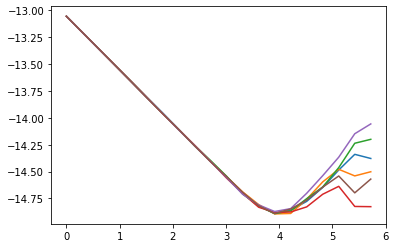

In [6]:
# calculate allan variance for original data
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(cov_mix_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_mix_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24439806e-13 8.79355188e-14 6.22760340e-14 4.40674987e-14
 3.11891916e-14 2.20954988e-14 1.56068969e-14 1.10055868e-14
 7.76800651e-15 5.60253725e-15 3.87098666e-15 2.77120560e-15
 2.16898065e-15 1.76668472e-15 1.93862207e-15 2.42694378e-15
 3.56900669e-15 5.37612252e-15 5.96038851e-15 1.14279727e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24413597e-13 8.80044457e-14 6.22351971e-14 4.41240396e-14
 3.11396666e-14 2.19911078e-14 1.56387106e-14 1.10155574e-14
 7.77991480

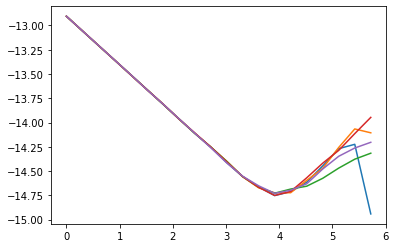

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24395353e-13 8.80406286e-14 6.22967746e-14 4.41536632e-14
 3.12603006e-14 2.19463095e-14 1.56629397e-14 1.10297075e-14
 7.79511943e-15 5.52023943e-15 3.84513872e-15 2.79758749e-15
 2.22589229e-15 1.86276815e-15 2.00486196e-15 2.33416170e-15
 3.31820357e-15 4.48810531e-15 5.45812881e-15 6.25113658e-15]
----------------------------------------
taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
adevs - [1.24555692e-13 8.80027349e-14 6.22684811e-14 4.40432740e-14
 3.11357956e-14 2.19553105e-14 1.55570323e-14 1.09531263e-14
 7.71559259

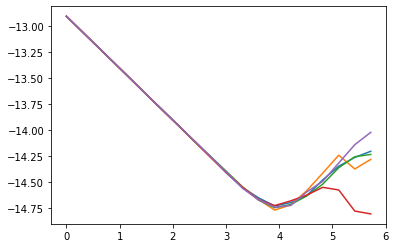

In [14]:
# calculate allan variance for minus data

for i in range(cov_data_1.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_1[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()
    
for i in range(cov_data_2.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=cov_data_2[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus), np.log10(adevs))
plt.show()

### 3. 计算Gamma

#### (1) For each 2 clocks calculate (OPTION)

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [ ]:
# def rolling_diff(arr, tau = 1):
#     # tau should be the power of 2
#     # arr is a one-dimension array
#     if tau >= len(arr):
#         raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
#     else:
#         result = list()
#         for i in range(len(arr)):
#             if i + tau >= len(arr):
#                 break
#             else:
#                 result.append(arr[i + tau] - arr[i])
#         return np.array(result)

In [ ]:
# def cal_cij_and_plot(cov_data, taus):
#     C_ij_all = list()
#     for tau in taus:
#         delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
#         print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
#         result = list()
#         for i in range(delta_clocks.shape[0]):
#             for j in range(delta_clocks.shape[0]):
#                 if i < j:
#                     C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
#                     result.append(C_ij)
#         C_ij_all.append(result)
    
#     C_ij_all = np.array(C_ij_all)
#     print(C_ij_all)
#     print(C_ij_all.shape)
    
#     for i in range(cov_data.shape[0]):
#         for j in range(cov_data.shape[0]):
#             if i < j:
#                 print("row1: %s, row2: %s" % (i, j))
#                 (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#                 (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
#                 C_ij = C_ij_all[:,i+j-1]
#                 multiply_adev_ij = 2 * adevs_i * adevs_j
#                 Gamma_ij = C_ij / multiply_adev_ij
#                 print('Gamma_ij - %s' % Gamma_ij)
#                 print("----------------------------------------")
#                 plt.plot(np.log10(taus), Gamma_ij)
#             else:
#                 continue

In [ ]:
# taus = 2 ** np.arange(0,20)

In [ ]:
#cal_cij_and_plot(cov_0_data, taus)

In [ ]:
#cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [8]:
def cal_cij_and_plot2(cov_data):
    for i in range(cov_data.shape[0]):
        for j in range(cov_data.shape[0]):
            if i < j:
                print("row1: %s, row2: %s" % (i, j))
                (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
                (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
                (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
                assert taus_i.shape == taus_j.shape == taus_ij.shape
            
                C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
                multiply_adev_ij = 2 * adevs_i * adevs_j
                Gamma_ij = C_ij / multiply_adev_ij
            
                print('tau - %s' % taus_ij)
                print('C_ij - %s' % C_ij)
                print('multiply_adev_ij - %s' % multiply_adev_ij)
                print('Gamma_ij - %s' % Gamma_ij)
                print("----------------------------------------")
                plt.plot(np.log10(taus_ij), Gamma_ij)
            else:
                continue

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [1.54688598e-26 7.73397365e-27 3.88064824e-27 1.95465707e-27
 9.80065918e-28 4.92928798e-28 2.51890495e-28 1.23582364e-28
 6.07136035e-29 3.13114969e-29 1.49113466e-29 7.42968011e-30
 4.67632322e-30 3.62746112e-30 3.82472308e-30 6.65360111e-30
 1.35859170e-29 3.82049948e-29 7.63377171e-29 1.51659672e-29]
multiply_adev_ij - [3.09640076e-26 1.54774332e-26 7.75152250e-27 3.88887211e-27
 1.94244206e-27 9.71808991e-28 4.88143487e-28 2.42465347e-28
 1.20868858e-28 6.28175681e-29 3.10137186e-29 1.52989714e-29
 9.20522503e-30 6.65876113e-30 7.32849565e-30 1.22938007e-29
 2.40389060e-29 5.95087122e-29 1.02305160e-28 1.78948775e-29]
Gamma_ij - [0.49957551 0.49969356 0.50063046 0.50262827 0.50455349 0.50722807
 0.51601732 0.50

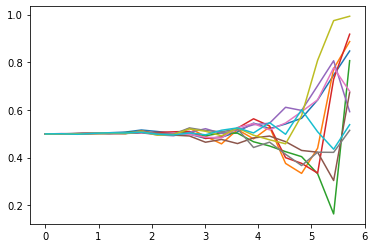

In [15]:
cal_cij_and_plot2(cov_data_1)

row1: 0, row2: 1
tau - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05]
C_ij - [1.55030588e-26 7.76297816e-27 3.87994746e-27 1.94741152e-27
 9.73878486e-28 4.75465092e-28 2.43773705e-28 1.20502484e-28
 5.99523309e-29 2.93934706e-29 1.52565092e-29 8.11513439e-30
 4.85175298e-30 3.23401644e-30 3.89570998e-30 6.36583691e-30
 1.31133683e-29 2.41131498e-29 1.21388274e-29 6.50377865e-29]
multiply_adev_ij - [3.09882984e-26 1.54956322e-26 7.75825107e-27 3.88934377e-27
 1.94662866e-27 9.63676078e-28 4.87337718e-28 2.41619560e-28
 1.20287932e-28 6.07816725e-29 3.02336048e-29 1.57940790e-29
 9.54970941e-30 6.32824442e-30 7.64427762e-30 1.21802830e-29
 2.55658506e-29 5.14648935e-29 4.61512321e-29 6.52842123e-29]
Gamma_ij - [0.50028752 0.50097847 0.50010594 0.50070439 0.50028981 0.49338684
 0.50021514 0.49

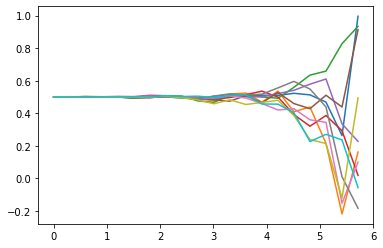

In [16]:
cal_cij_and_plot2(cov_data_2)

#### (3) For each group, calculate harmonic mean

In [17]:
def cal_var_harmonic_mean(cov_group, cov_ref = None):
    var_list = list()
    cov_data = cov_group
    if cov_ref is not None:
        cov_data = cov_group - cov_ref
    for i in range(cov_data.shape[0]):
        (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
        var_list.append(1.0 / adevs_i ** 2)
    return taus_i, (cov_data.shape[0] / np.sum(var_list, axis=0))

[1.24392312e-13 8.79557910e-14 6.22441010e-14 4.41020280e-14
 3.11967384e-14 2.20232183e-14 1.56367947e-14 1.09960691e-14
 7.78557522e-15 5.59124582e-15 3.92609430e-15 2.77689676e-15
 2.16376349e-15 1.82854705e-15 1.96571145e-15 2.42145487e-15
 3.26955869e-15 4.55082276e-15 5.78739131e-15 2.41346909e-15]


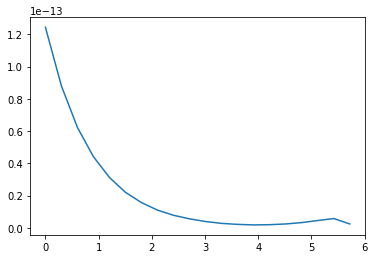

In [22]:
taus, cov_data_1_harmonic = cal_var_harmonic_mean(cov_data_1)
print(np.sqrt(cov_data_1_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_1_harmonic))

[1.24487208e-13 8.79782732e-14 6.22979975e-14 4.40613263e-14
 3.11433570e-14 2.19404769e-14 1.55598851e-14 1.10178117e-14
 7.78537220e-15 5.52007898e-15 3.90713348e-15 2.80028781e-15
 2.15119996e-15 1.80484301e-15 1.95470261e-15 2.42646620e-15
 3.19001976e-15 3.96392236e-15 3.15333174e-15 3.12076542e-15]


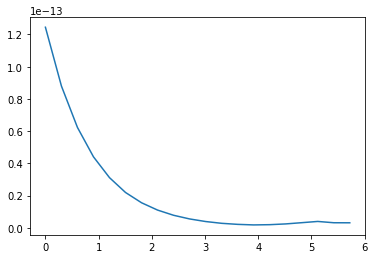

In [23]:
taus, cov_data_2_harmonic = cal_var_harmonic_mean(cov_data_2)
print(np.sqrt(cov_data_2_harmonic))
plt.plot(np.log10(taus), np.sqrt(cov_data_2_harmonic))

### 4. 带入模型进行测试

In [24]:
cov_data = cov_data_1
y_t = cov_data.T
clock_size = y_t.shape[1]

In [25]:
regularization = False
subset_size_list = [3, 5]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [9.63997621e-14 8.02278457e-14 5.20736642e-14 2.86585644e-14
 2.23017543e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [9.69877449e-14 7.87362757e-14 5.13244117e-14 2.78100145e-14
 2.49845333e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.00598451e-13 7.94730899e-14 5.64948399e-14 2.79962712e-14
 1.16114211e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.21300846e-13 1.03185303e-13 4.92777371e-14 4.06746247e-14
 4.38868814e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.36763382e-13 1.20199214e-13 6.58950158e-14 2.33890332e-14
 3.72237444e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.15887694e-13 9.05773120e-14 5.57201600e-14 3.31176821e-14
 7.32921443e-15]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.33186528e-13 1.13784107e-13 3.94962017e-14 3.96649696e-14
 4.85301386e-14]
taus - [

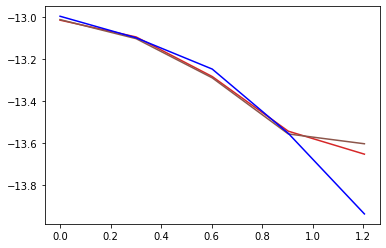

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.13781791e-13 7.10044132e-14 4.41474178e-14 4.53341960e-14
 2.26051899e-14 1.37510541e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.13105583e-13 7.16891891e-14 4.70776383e-14 5.13937063e-14
 2.42207775e-14 1.67920884e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.03247013e-13 5.90432148e-14 5.25980671e-14 3.22570848e-14
 2.51733455e-14 8.06472382e-15]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.09435260e-13 8.74258938e-14 4.97871637e-14 3.41525218e-14
 2.81256122e-14 1.93754576e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.21842252e-13 9.66522952e-14 6.16892267e-14 2.26472897e-14
 3.31134032e-14 5.61551229e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.21546490e-13 8.92380753e-14 5.89454695e-14 3.29848827e-14
 3.78883903e-14 4.69008957e-14

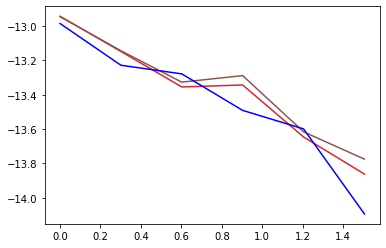

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.60662728e-14 6.59601142e-14 4.83352331e-14 3.87290801e-14
 2.72705704e-14 1.65633181e-14 1.15081603e-14 5.46137516e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.43393919e-14 6.54577464e-14 4.66970222e-14 3.87731380e-14
 2.65426084e-14 1.54486574e-14 1.19670334e-14 5.20594923e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.00954019e-13 7.33503563e-14 4.95719732e-14 3.33282388e-14
 2.23870523e-14 1.45631713e-14 1.01799652e-14 6.69602614e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.19987911e-13 8.68022355e-14 5.73644956e-14 4.11097361e-14
 2.89604959e-14 2.16588487e-14 1.10814558e-14 8.69313668e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.25598224e-13 8.05335027

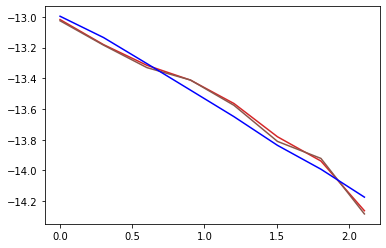

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.61604366e-14 6.46048290e-14 4.78399423e-14 3.12521128e-14
 2.49537848e-14 1.85307952e-14 1.71926417e-14 1.04670125e-14
 8.87828057e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.52227213e-14 6.28573514e-14 4.70486636e-14 3.00253138e-14
 2.38586805e-14 1.75702085e-14 1.65604988e-14 1.03577123e-14
 8.15454438e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.53896845e-14 6.67895998e-14 5.01012616e-14 3.51802751e-14
 2.64842669e-14 2.00490883e-14 1.27212012e-14 9.30204265e-15
 4.42123491e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [1.23399319e-13 8.86611256e-14 6.29138025e-14 4.30177246e-14
 3.25898034e-14 2.59979912e-14 1.67294787e-14 9.45422592e-15
 1.06889327e-14]
t

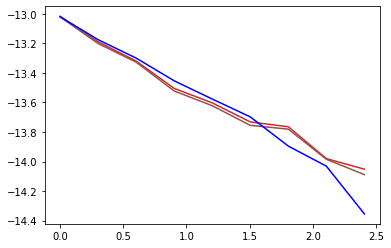

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.68849475e-14 6.65988545e-14 4.80819766e-14 3.52951095e-14
 2.32282832e-14 1.49332902e-14 1.23771277e-14 9.31131207e-15
 5.01003985e-15 4.94102565e-15 5.29599232e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.54372923e-14 6.49367341e-14 4.71407021e-14 3.40859102e-14
 2.25998058e-14 1.44646617e-14 1.22423173e-14 8.97991716e-15
 4.56469891e-15 4.39581573e-15 4.74202182e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.82639850e-14 6.65335281e-14 4.62018634e-14 3.35631686e-14
 2.27691297e-14 1.59445708e-14 1.37315358e-14 1.15599727e-14


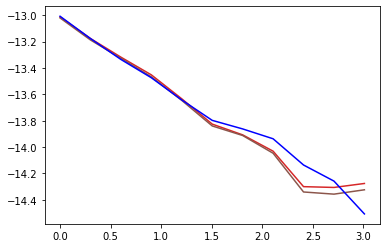

6000 600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.76426255e-14 6.86780055e-14 4.83460980e-14 3.49969501e-14
 2.56402158e-14 1.81528989e-14 1.29572347e-14 9.15424148e-15
 6.93194952e-15 4.17371074e-15 5.19978121e-15 2.79008663e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.63655072e-14 6.73748630e-14 4.76077494e-14 3.39177018e-14
 2.49955735e-14 1.77200400e-14 1.24497806e-14 8.96546002e-15
 6.91870735e-15 3.86514971e-15 4.61989913e-15 2.75818842e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.64875442e-14 6.87833778e-14 4.99697820e-14 3.50324192e-14
 2

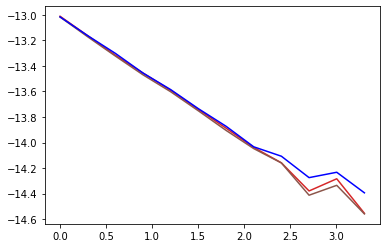

3000 300
Done


In [26]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')

In [27]:
cov_data = cov_data_2
y_t = cov_data.T
clock_size = y_t.shape[1]

In [28]:
regularization = False
subset_size_list = [3, 5]
window_step_list = [60*60*12, 60*60*6, 60*60, 60*30, 60*10, 60*5]
amplify = [2, 2, 5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.00242263e-13 5.80891885e-14 3.89205230e-14 1.83356521e-14
 2.98724230e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.00619679e-13 5.55276918e-14 3.69908889e-14 1.95499388e-14
 3.34692566e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.02159745e-13 7.77863352e-14 7.97046291e-14 4.60668780e-14
 1.05115436e-14]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16.], adevs - [1.34285798e-13 8.93003576e-14 5.66766939e-14 3.68429346e-14
 1.79632314e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.21534647e-13 6.98308348e-14 7.17567289e-14 6.17092044e-14
 5.53876774e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [9.58589351e-14 8.11320968e-14 4.48524910e-14 3.24720453e-14
 1.96792949e-14]
taus - [ 1.  2.  4.  8. 16.], adevs - [1.24556481e-13 6.78823671e-14 4.09937815e-14 3.01938913e-14
 1.30588578e-14]
taus - [

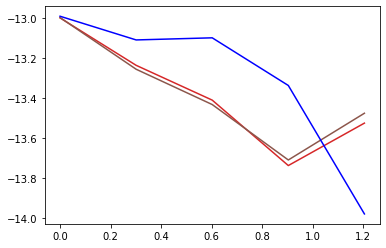

86400 43200
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.02139228e-13 7.33266769e-14 4.59451517e-14 5.08871471e-14
 1.92373789e-14 1.68838465e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.03862652e-13 7.40844944e-14 4.69282888e-14 5.37289585e-14
 2.18500640e-14 1.81619042e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [9.52475658e-14 6.73321944e-14 4.96944834e-14 4.25144537e-14
 4.95932091e-14 7.38713087e-15]
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.23733913e-13 7.44219133e-14 5.66242933e-14 4.20924170e-14
 2.05860071e-14 3.34002172e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.20923846e-13 6.11286416e-14 5.74413298e-14 4.73093770e-14
 3.24858453e-14 1.54768587e-14]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [1.10926518e-13 7.66129852e-14 5.98617430e-14 4.18747787e-14
 2.79677123e-14 2.28129278e-14

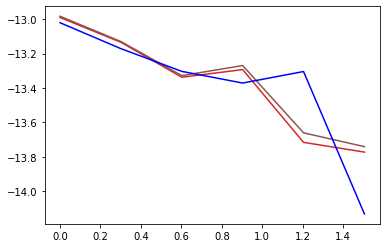

43200 21600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.79594783e-14 7.59740802e-14 4.57524696e-14 3.06978392e-14
 2.35868877e-14 2.42249389e-14 1.50782204e-14 1.11081881e-14]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.63976317e-14 7.43555634e-14 4.38916938e-14 3.10156409e-14
 2.33976891e-14 2.44538848e-14 1.57663478e-14 1.00418182e-14]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [9.78364862e-14 6.58826429e-14 4.92789301e-14 3.38191034e-14
 1.95628259e-14 1.67416221e-14 1.08019589e-14 5.34214782e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.28411524e-13 8.24528394e-14 5.12400443e-14 3.66620445e-14
 2.95999916e-14 2.80559166e-14 1.19242190e-14 9.48660440e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128.], adevs - [1.17429757e-13 8.36476439

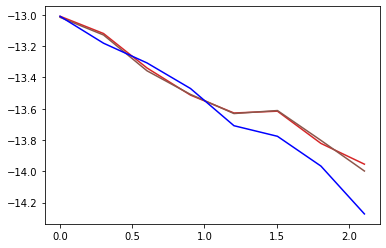

18000 3600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.78595949e-14 6.96763724e-14 4.95612313e-14 3.70762686e-14
 2.48016810e-14 1.79843846e-14 7.93893819e-15 8.41360126e-15
 7.07823078e-15]
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.62370982e-14 6.94194477e-14 4.97446798e-14 3.63077362e-14
 2.36982794e-14 1.74874937e-14 7.81611846e-15 8.42951968e-15
 5.80719755e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [9.72380698e-14 6.72414894e-14 4.65448211e-14 3.76178661e-14
 2.72367679e-14 1.77720394e-14 1.24241158e-14 5.96252132e-15
 5.21370893e-15]
*** Each clock's Allan deviation ***
taus - [  1.   2.   4.   8.  16.  32.  64. 128. 256.], adevs - [1.22234473e-13 8.15705293e-14 5.69713764e-14 4.27036994e-14
 3.08687163e-14 2.59147591e-14 2.00628137e-14 1.14661695e-14
 9.42192890e-15]
t

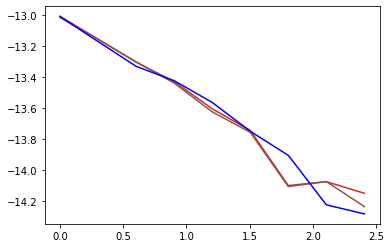

9000 1800
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.77504957e-14 6.94964433e-14 4.86743229e-14 3.37492131e-14
 2.43172263e-14 1.77985911e-14 1.21886806e-14 9.35202768e-15
 8.80048836e-15 7.09728354e-15 6.36973164e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.59922346e-14 6.85134886e-14 4.81218702e-14 3.26741766e-14
 2.36682028e-14 1.74969348e-14 1.20974849e-14 9.12606470e-15
 8.68373474e-15 6.56628402e-15 5.72337257e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03], adevs - [9.80146158e-14 6.89944520e-14 4.78617752e-14 3.38641236e-14
 2.35545327e-14 1.71258385e-14 1.22018804e-14 1.00711629e-14


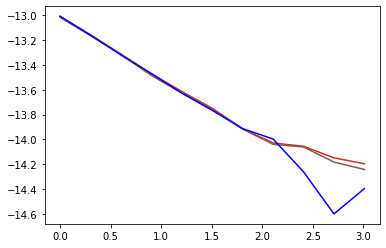

6000 600
------------------Overall------------------
*** Weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.73829154e-14 6.82924728e-14 4.90082369e-14 3.36912878e-14
 2.45352594e-14 1.55018086e-14 1.32574773e-14 7.95732645e-15
 8.46936124e-15 8.48765410e-15 5.61910090e-15 3.59640865e-15]
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.59824420e-14 6.71613161e-14 4.83126956e-14 3.27236147e-14
 2.43421183e-14 1.53779597e-14 1.27357084e-14 7.38064683e-15
 7.99892112e-15 8.13250020e-15 5.10195598e-15 3.05118856e-15]
*** Inverse variance weighted clock's Allan deviation ***
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03], adevs - [9.66566936e-14 6.90539324e-14 4.93193742e-14 3.44355659e-14
 2

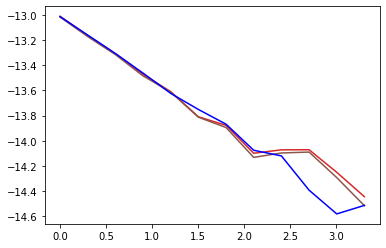

3000 300
Done


In [29]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus), np.log10(adevs), color=color)

    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus, adevs, errors, ns) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus, adevs))
    plt.plot(np.log10(taus), np.log10(adevs), color='blue')

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')